In [1]:
from __future__ import division, absolute_import, print_function
%load_ext autoreload
%autoreload 2

import os 
print(os.getcwd()) 
    
#import hepran
#import hepran.bzipscore as bz
#import hepran.bcipa as bc
#import hepran.utils as u
#import hepran.registers as r
#import hepran.agadir as ag

import pandas as pd
import numpy as np
import seaborn as sns
    
%matplotlib inline

import matplotlib as mpl
import matplotlib.pylab as plt

import sklearn as sk


CCO = os.environ.get("CCO",r"C:\Projekti_KI\ortoCC\CoiledCoilOrtho")


def getRMSE(x, y, df):
    return np.sqrt(((df[x]-df[y])**2).mean())

D:\data\ortoCC\fine_tune_scoring_function


In [2]:
df = pd.read_excel('data/round0_fiting.xlsx',index_col=[0,1])

In [3]:

#Q = df['HP_12 c_NN c_IN c_II es_EE es_EK es_KK Tm on_target'.split()]
Q = df.query('(Tm > 25)')
print(len(Q))
Q.head()


95


seq1                           seq2  Tm  \
ID1 ID2                                                                     
O1  O2   DKNAALKAENAALEYEIAALEAEIAALEG  DENAALEAKNAALKYKIAALKAKIAALKG  72   
O2  O2   DENAALEAKNAALKYKIAALKAKIAALKG  DENAALEAKNAALKYKIAALKAKIAALKG  34   
    O3   DENAALEAKNAALKYKIAALKAKIAALKG  DEIAALEAKIAALKYENAALEAENAALEG  27   
O3  O4   DEIAALEAKIAALKYENAALEAENAALEG  DKIAALKAEIAALEYKNAALKAKNAALKG  68   
O2  O5   DENAALEAKNAALKYKIAALKAKIAALKG  DENAALEAEIAALEYKNAALKAEIAALEG  30   

         on_target   avg_HP1   avg_HP2  avg_HP_12    HP1    HP2  HP_12  \
ID1 ID2                                                                  
O1  O2        True  1.286897  1.237241   1.262069  37.32  35.88  73.20   
O2  O2       False  1.237241  1.237241   1.237241  35.88  35.88  71.76   
    O3       False  1.237241  1.286897   1.262069  35.88  37.32  73.20   
O3  O4        True  1.286897  1.237241   1.262069  37.32  35.88  73.20   
O2  O5       False  1.237241  1.286897   1.262069  35.88  37.32  73.20   

                ...           cterm_c_II  c_NN  c_IN  c_II  es_EE  es_EK  \
ID1 ID2         ...                                                        
O1  O2          ...                    1     2     0     2      0      8   
O2  O2          ...                    1     2     0     2      2      0   
    O3          ...                    0     0     4     0      2      4   
O3  O4          ...                    0     2     0     2      0      8   
O2  O5          ...                    1     1     2     1      2      4   

         es_KK  interface_charge1  interface_charge2  interface_repulsion  
ID1 ID2                                                                    
O1  O2       0                 -4                  4                  -16  
O2  O2       6                  4                  4                   16  
    O3       2                  4                 -4                  -16  
O3  O4       0                 -4                  4                  -16  
O2  O5       2                  4                 -4                  -16  

[5 rows x 25 columns]

R2:  0.503521082855
RMSE all:  16.152309022
RMSE trained:  9.43938185323
RMSE on_target:  10.0799686777


,feature,coef
0,c_NN,0.995733
1,c_IN,-1.991465
2,c_II,0.995733
3,es_EE,-0.726961
4,es_EK,1.829485
5,es_KK,-1.102524
6,nterm_c_NN,4.730833
7,nterm_c_IN,0.092861
8,nterm_c_II,-4.823693
9,cterm_c_NN,4.900073


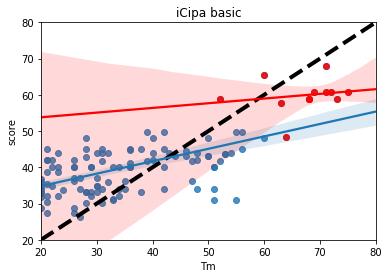

In [4]:
import sklearn
from sklearn import linear_model

basic = 'c_NN c_IN c_II es_EE es_EK es_KK'.split()
core_ends = 'nterm_c_NN nterm_c_IN nterm_c_II cterm_c_NN cterm_c_IN cterm_c_II'.split()


fit_type = "basic_ends_rep"
fit_fields = basic + ['interface_repulsion']
fit_type = "basic_rep"
fit_fields = basic + core_ends
fit_type = "basic_ends"
fit_fields = basic
fit_type = "basic"
fit_fields = basic + core_ends+['interface_repulsion']

Y=Q['Tm']
X=Q[fit_fields] 
lm = linear_model.Ridge(normalize=False, alpha=0.003)
lm.fit(X, Y)
#lm.coef_ = [70, 5, -5, 5, -5, 5, -5]
#lm.intercept_=20
lm.fit(X, Y)

df['score'] = lm.predict(df[fit_fields])
df.to_excel('data/mason_both.iCipa_{fit_type}.score.xlsx'.format(**locals()))


plt.plot([20,80], [20,80], 'k--', lw=4)
plt.title('iCipa '+fit_type)
plt.ylim([20,80])
plt.xlim([20,80])
#print(fit_fields)
print("R2: ",lm.score(X,Y))
print("RMSE all: ",getRMSE('Tm', 'score', df))
print("RMSE trained: ",getRMSE('Tm', 'score', df.query('Tm > 25')))
print("RMSE on_target: ",getRMSE('Tm', 'score', df.query('on_target')))
sns.regplot(x='Tm', y='score', fit_reg=True, data=df)
sns.regplot(x='Tm', y='score', fit_reg=True, data=df.query('on_target'), color='red')

#ax = plt.gca()
#for n,q in Q.query('on_target').iterrows():
#    #print(q.name,q.Tm, q.Tm_pred)
#    ax.annotate(q.name, (q.Tm, q.Tm_pred))
pd.DataFrame(zip(X.columns, lm.coef_), columns="feature coef".split())

In [9]:
import bokeh
import bokeh.plotting as bp
from bokeh.models import HoverTool
from IPython.core.display import display, HTML
import hepran
bp.output_notebook()

Loading BokehJS ...

In [12]:
from Interactive_set_plot import *
def get_formated_seq(row):
    row['seq1_disp'] = hepran.registers.html_format_amino_acids(row.seq1,'f')
    row['seq2_disp'] = hepran.registers.html_format_amino_acids(row.seq2,'f')
    return row

df = df.apply(get_formated_seq, axis=1)

df['IDs']=df.index


bp.show(draw_scatter_interactive('Tm','score',df, title=fit_type))